In [81]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

In [82]:
def read_db_from_dump():
    return pd.read_csv("data_dump.csv")[["Project Name", "Project Language", "Technical Debt Ratio", "Number of Lines of Code", "Technical Debt"]]

In [83]:
df = read_db_from_dump()
df = df.sort_values(by="Project Language")

In [84]:
langz = list(df["Project Language"])
languages = []
for l in langz:
    if l not in languages:
        languages.append(l)

In [85]:
df["SNTDR"] = df["Technical Debt"] / df["Number of Lines of Code"]

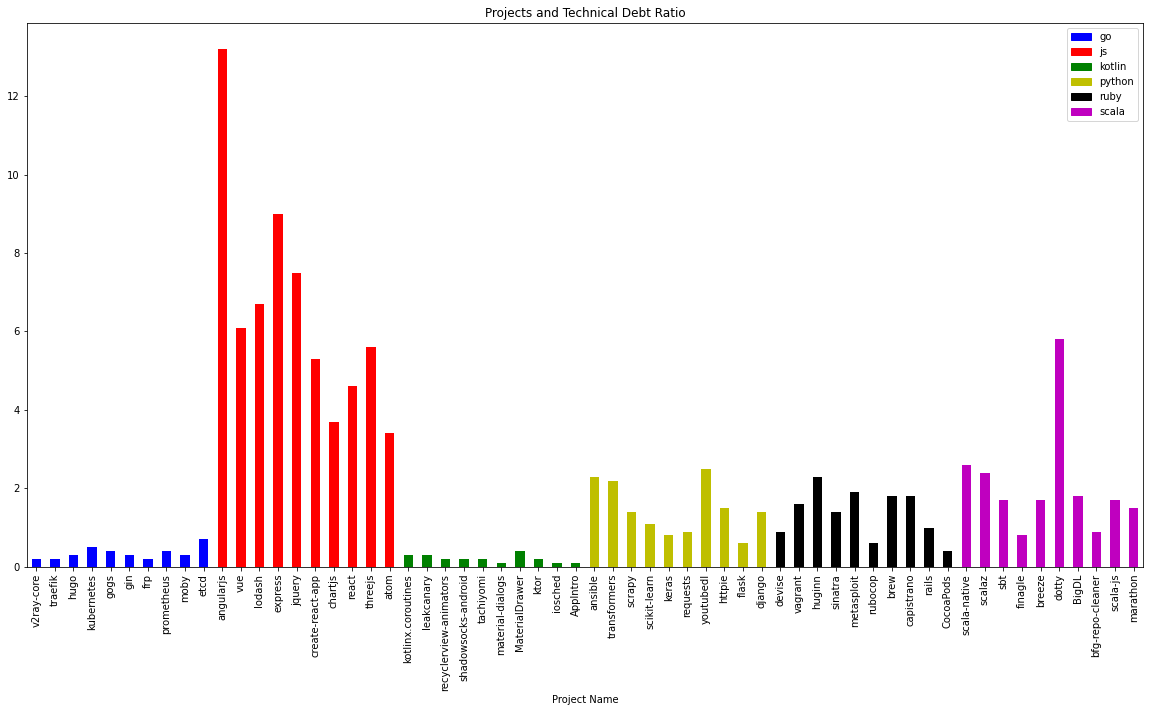

In [86]:
import matplotlib.patches as mpatches

available_colors = ('b', 'r', 'g', 'y', 'k', 'm')
colors = []
for c in available_colors:
    colors = colors + [c] * 10

patches = []
for i, c in enumerate(available_colors):
    patches.append(mpatches.Patch(color=c, label=languages[i]))

ax = df.plot.bar(x="Project Name", y='Technical Debt Ratio', rot=90, color=colors, title="Projects and Technical Debt Ratio")
ax.legend(handles=patches)
ax.get_figure().savefig('tdr.jpg')

<AxesSubplot:xlabel='Project Language', ylabel='Technical Debt Ratio'>

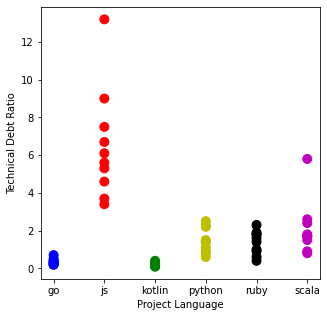

In [87]:
plt.rcParams["figure.figsize"] = [5, 5]

df.plot.scatter(x="Project Language", y="Technical Debt Ratio", s=80, color=colors)

In [88]:
lang_to_type_system = {
    'go': 'static',
    'kotlin': 'static',
    'scala': 'static',
    'js': 'dynamic',
    'python': 'dynamic',
    'ruby': 'dynamic'
}

df["Type System"] = df["Project Language"].map(lang_to_type_system)

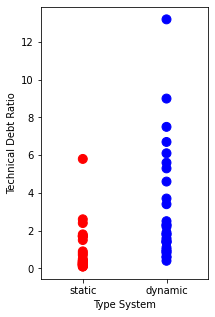

In [89]:
plt.rcParams["figure.figsize"] = [3, 5]
df = df.sort_values(by="Type System", ascending=False)
ax = df.plot.scatter(x="Type System", y="Technical Debt Ratio", s=80, color=['r']*30 + ['b']*30)
ax.margins(x=0.5)